In [1]:
from lxml import etree
import pandas as pd
from collections import Counter
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


wdir = "../../../resulting data/"


In [2]:
verses_features = pd.read_parquet(wdir +  "verses_features.parquet")

In [3]:
verses_features

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org52,#per129,pla15,#pla74,pla69,org435,org297,org183,org102,#pla75
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31060,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31061,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31062,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31063,b.REV.022.020,REV,022,REV.022,apocalyptic,11981,6014,5967,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org52,#per129,pla15,#pla74,pla69,org435,org297,org183,org102,#pla75
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
len(['#tim3',
 '#per14',
 '#pla41',
 'number of entities referred',
 'number of different entities referred',
 'people',
 'number of different people',
 'number of different groups',
 'number of different places',
 'times',
 'number of different times',
 'works',
 'number of different works',
 'number of 1st level quotations',
 'number of 2nd level quotations',
 'number of 3rd level quotations',
 'number of 4th level quotations',
 'number of 5th level quotations',
 'number of 6th level quotations',
 'number of 7th level quotations',
 'number of quotations',
 'number of entities communicating',
 'number of different entities communicating',
 'number of entities receiving communication',
 'number of different entities receiving communication',
 'number of oral quotations',
 'number of dream quotations',
 'number of praying quotations',
 'number of oath quotations',
 'number of written quotations',
 'number of song quotations',
 'number of soCalled quotations',
 'number of idea quotations',
 '#per17',
 '#org0',
 '#per145',
 '#per241',
 '#pla77',
 '#pla39',
 '#pla85'])

40

In [20]:
sexual_categories = verses_features.columns.tolist()[8:260]

In [28]:
verses_features.columns.tolist()[8:260]

['relations',
 'monogamy',
 'poligamy',
 'marriage',
 'second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'indirect-ascendant-descendant',
 'acts',
 'social-related-act',
 'wedding',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'sexual-act',
 'sexual-act-stage',
 'seduction',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'first-sexual-act',
 'coitus-interruptus',
 'self-masturbation',
 'masturbation',
 'oral-sex',
 'anal-sex',
 'non-penetrative-sex',
 'female-rape',
 'male-rape',
 'sexual-assault',
 'female-sexual-assault',
 'male-sexual-assault',
 'sexual-deception',


In [5]:
verses_features.fillna(0, inplace=True)

In [6]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org52,#per129,pla15,#pla74,pla69,org435,org297,org183,org102,#pla75
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
verses_features[verses_features["coitus"] > 0 ]["bible_identifier"].values.tolist()

['b.GEN.004.001',
 'b.GEN.004.017',
 'b.GEN.004.025',
 'b.GEN.016.002',
 'b.GEN.016.003',
 'b.GEN.016.004',
 'b.GEN.020.004',
 'b.GEN.024.016',
 'b.GEN.024.067',
 'b.GEN.026.010',
 'b.GEN.029.023',
 'b.GEN.029.030',
 'b.GEN.030.003',
 'b.GEN.030.004',
 'b.GEN.030.016',
 'b.GEN.034.002',
 'b.GEN.034.007',
 'b.GEN.035.022',
 'b.GEN.038.002',
 'b.GEN.038.016',
 'b.GEN.038.018',
 'b.GEN.039.007',
 'b.GEN.039.010',
 'b.GEN.039.012',
 'b.GEN.039.014',
 'b.GEN.039.015',
 'b.GEN.039.017',
 'b.GEN.039.018',
 'b.GEN.049.004',
 'b.RUT.004.013',
 'b.MAT.001.025',
 'b.MAT.019.005',
 'b.MAT.019.006']

In [8]:
verses_features["number of 1st level quotations"].sum()

18816.0

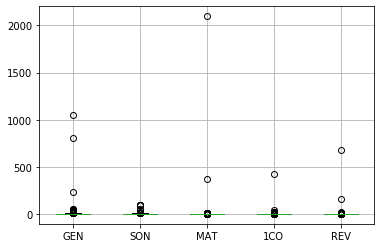

In [23]:
verses_features[sexual_categories+["bible_book"]].groupby(["bible_book"]).sum().T[["GEN", "SON", "MAT", "1CO", "REV"]].boxplot()

In [27]:
verses_features[sexual_categories].sum().sort_values()

body-function               0
ejaculation                 0
sexual-act-type             0
coitus-interruptus          0
anal-sex                    0
                        ...  
love                      113
positive-aspect           180
ascendant-descendant      253
places                  18219
groups                  45913
Length: 252, dtype: int64